In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pygame
from time import sleep

# Fourier Synthesis
## Time series

In [2]:
# constants
T = 2*np.pi
T0 = .25 * T
omega0 = 2*np.pi / T

# function
x = lambda t, t0: (np.abs(t) < t0).astype(float)

# time steps
ts = np.linspace(-T/2, T/2, 100)
xs = x(ts, T0)


## Fourier coefficients

In [3]:
# coeffs
def ak_gen(k):
    if k == 0:
        return .5
    return np.sin(np.pi * k/2)/(k*np.pi)

# approximation
x_hat = lambda t, K, omega0, ak: sum([ak(k) * np.exp(1j * k  * omega0 * t) for k in range(-K, K + 1)])


In [4]:
x_approximations = {}
for i in [1, 2, 3, 8, 12, 15, 20, 25, 30, 50]:
    x_approximations[i] = np.real(x_hat(ts, i, omega0, ak_gen))

## Plot

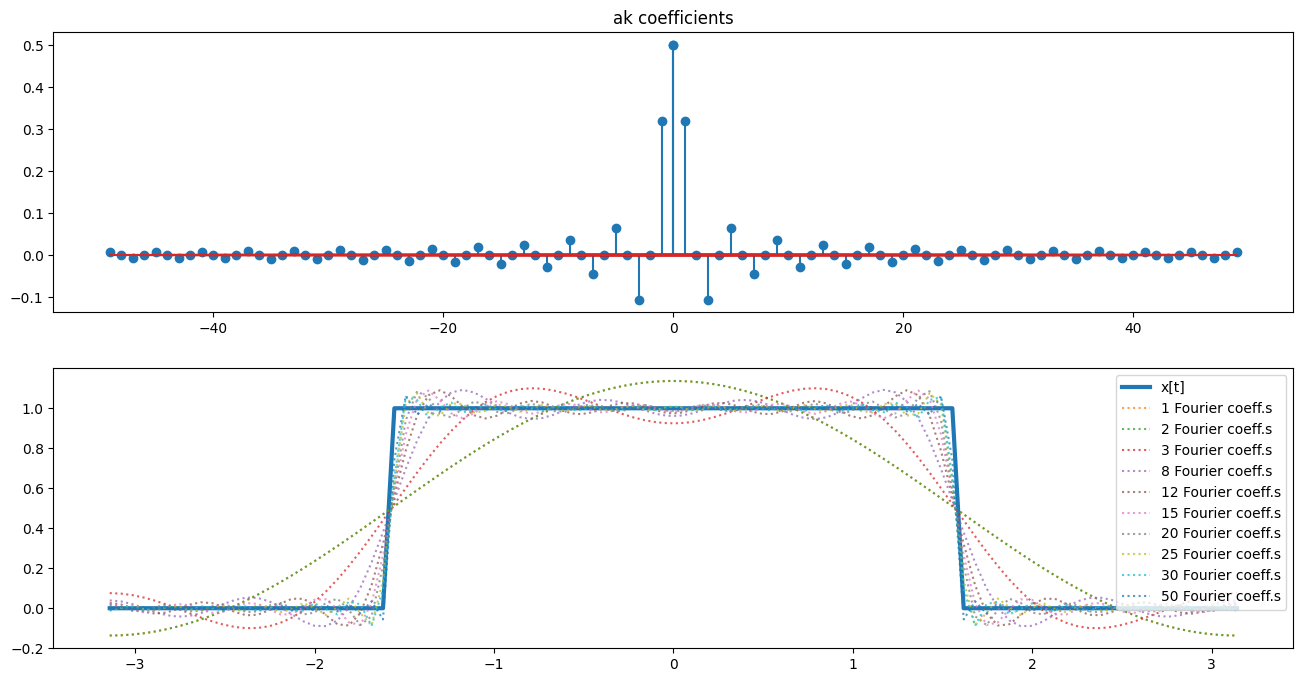

In [20]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
axes[1].plot(ts, xs, label='x[t]', linewidth=3)

for i in range(max(list(x_approximations.keys()))):
    axes[0].set_title('ak coefficients')
    axes[0].stem([i*omega0, -i*omega0,], [ak_gen(i), ak_gen(-i)])
for i in x_approximations:
    axes[1].plot(ts, np.real(x_approximations[i]), ':',
            label=f'{i} Fourier coeff.s', alpha=0.75)

axes[1].legend()
plt.show()

## Play as sound
### Init mix

In [16]:
pygame.mixer.pre_init(80000, size=-16, channels=1)
pygame.mixer.init()

### Play original

In [18]:
# original
x_sound = np.array(1000 * list(xs))
sound = pygame.sndarray.make_sound((.1 *x_sound*32768).astype(np.int16))
print('Playing original...', end='\r')
sound.play()

sleep(1)

### Approximations

In [19]:
for i in x_approximations:
    x_sound = np.array(1000 * list(x_approximations[i]))
    sound = pygame.sndarray.make_sound((.1 *x_sound*32768).astype(np.int16))
    print(f"Playing {i}'th aproximation...", end='\r')
    sound.play()
    sleep(1.5)

In [10]:
pygame.mixer.quit()